In [286]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from wordcloud import WordCloud, STOPWORDS
import string
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
# from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder
import re
from collections import Counter
warnings.filterwarnings('ignore')

In [287]:
#creating word cloud for given corpus  
def make_wordcloud(corpus , stopword):
    word_cloud = WordCloud(
            width=3000,
            height=2000,
            random_state=1,
            background_color="black",
            colormap="Pastel1",
            collocations=False,
            stopwords=stopword,
            ).generate(corpus)
    return word_cloud

In [288]:
#This function swaps 2 columns inside the dataframe
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [289]:
#This function removes punctuation from string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [290]:
#Reading dataset
Email_dataset = pd.read_csv("spam_ham_dataset.csv")

In [291]:
# #Show dataset
# Email_dataset.head()

In [292]:
s=Email_dataset["label"].value_counts()
s

label
ham     3672
spam    1499
Name: count, dtype: int64

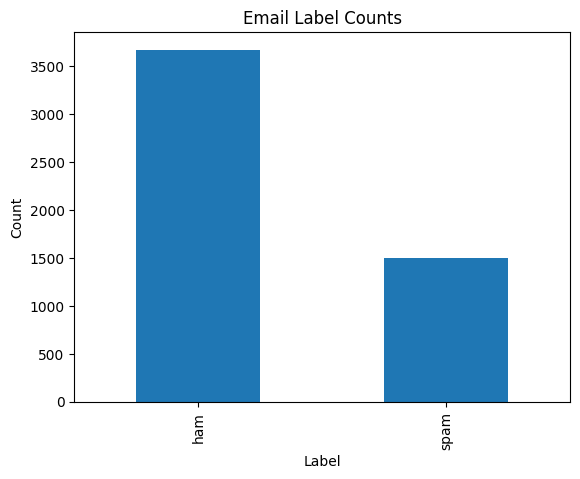

In [293]:
# create a bar chart
s.plot.bar()

# set the title and axis labels
plt.title("Email Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")

# display the chart
plt.show()

In [294]:
#Dropping columns that are not needed
Email_dataset = Email_dataset.drop('Unnamed: 0', axis=1)
Email_dataset = Email_dataset.drop('label', axis=1)

In [295]:
# Email_dataset.head()

In [296]:
#Creating a new feature, extracting subject of each email
subjects = []
for i in range(len(Email_dataset)):
    ln = Email_dataset["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [297]:
Email_dataset['Subject'] = subjects

In [298]:
#Renaming the dataframe columns
Email_dataset.columns = ["Email_text" , "Labels" , "Email_Subject"]

In [299]:
# Email_dataset.head()

In [300]:
#Swapping the dataframe columns 
Email_dataset = swap_columns(Email_dataset, 'Labels', 'Email_Subject')

In [301]:
# Email_dataset.head()

In [302]:
#Converting all strings to lowercase
Email_dataset['Email_Subject'] = Email_dataset['Email_Subject'].str.lower()
Email_dataset['Email_text'] = Email_dataset['Email_text'].str.lower()

In [303]:
#Removing Punctuation from the data
Email_dataset['Email_Subject'] = Email_dataset['Email_Subject'].apply(remove_punctuations)
Email_dataset['Email_text'] = Email_dataset['Email_text'].apply(remove_punctuations)

In [304]:
# Email_dataset.head()

In [305]:
#Creting seprate dataset for Spam and Non Spam emails, to perform analysis 
Spam = pd.DataFrame(columns = ['Email_text', 'Email_Subject', 'Labels'])
Non_Spam = pd.DataFrame(columns = ['Email_text', 'Email_Subject', 'Labels'])

In [306]:
#Creating Non_Spam email dataset 
for i in range(len(Email_dataset)):
    if(Email_dataset['Labels'][i] == 0):
        new_row = {'Email_text':Email_dataset['Email_text'][i], 'Email_Subject':Email_dataset['Email_Subject'][i], 'Labels':Email_dataset['Labels'][i]}
        Non_Spam.loc[len(Non_Spam)] = new_row

In [307]:
#Creating Spam email dataset 
for i in range(len(Email_dataset)):
    if(Email_dataset['Labels'][i] == 1):
        new_row = {'Email_text':Email_dataset['Email_text'][i], 'Email_Subject':Email_dataset['Email_Subject'][i], 'Labels':Email_dataset['Labels'][i]}
#         Spam = Spam.append(new_row, ignore_index=True)
        Spam.loc[len(Spam)] = new_row

In [308]:
# Spam.head()

In [309]:
# Non_Spam.head()

In [310]:
# #create a corpus conatininga all the email text 
# Email_text_corpus = []
# for line in Email_dataset['Email_text']:
#     words = line.split(" ")
#     Email_text_corpus.append(words)

In [311]:
# #create a word2vec model for words in email text 
# model = Word2Vec(Email_text_corpus, min_count=1, vector_size=56)

In [312]:
# X = model.wv[model.wv.key_to_index ]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
# pca_df = pd.DataFrame(result, columns = ['x','y'])

In [313]:
# #visualizing the corpus as a word vector
# N = 1000000
# words = list(model.wv.key_to_index)
# fig = go.Figure(data=go.Scattergl(
#    x = pca_df['x'],
#    y = pca_df['y'],
#    mode='markers',
#    marker=dict(
#        color=np.random.randn(N),
#        colorscale='Viridis',
#        line_width=1
#    ),
#    text=words,
#    textposition="bottom center"
# ))

# fig.show()

In [314]:
# Email_dataset.head()

In [315]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [316]:
def cost_function(h, y):
    return (-y * np.log(h + 1e-10) - (1 - y) * np.log(1 - h + 1e-10)).mean()

Gradient Descent is used while training a machine learning model. It's an optimization algorithm, used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

In [317]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

Weights are updated iteratively by taking steps proportional to the negative of the gradient.

In [318]:
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

Convert the 'Email_text' column to a matrix of token counts.

In [319]:
X = Email_dataset['Email_text']
y = Email_dataset['Labels'].values

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
# Fit the CountVectorizer on your training data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()

# Transform your test data using the same vectorizer
X_test = vectorizer.transform(X_test).toarray()

In [322]:
num_iter = 1000
learning_rate = 0.1
weight = np.zeros(X_train.shape[1])

In [323]:
costs = []

In [324]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [325]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[732  10]
 [ 10 283]]


0.9806763285024155

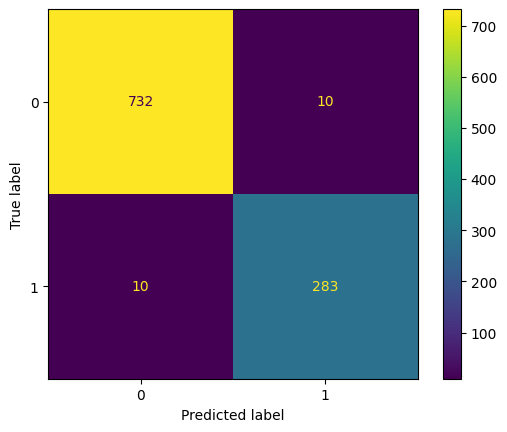

In [326]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)


# creating decision_tree_classification

In [327]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [328]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 0]
 [0 0]]


In [329]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[705  37]
 [ 18 275]]


0.9468599033816425

# Modified Naïve Bayes

In [330]:
total_emails = len(Email_dataset)

#prior probabilities
spam_not_spam_counter = Counter(Email_dataset["Labels"])
prior_not_spam = spam_not_spam_counter[0] / total_emails
prior_spam = spam_not_spam_counter[1] / total_emails
print(prior_not_spam)
print(prior_spam)

0.7101140978534133
0.2898859021465867


In [421]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
for word in stop_words:
    remove_punctuations(word)
# print(stop_words)

# def remove_words(text, words):
#     for word in words:
#         text = text.replace(word, '')
#     return text

# def remove_nums(text):
#     text = ''.join([i for i in text if not i.isdigit()])
#     return text

# non_spam_body = Non_Spam["Email_text"].apply(lambda x: remove_words(x, stop_words)).apply(lambda x: remove_nums(x))
# spam_body = Spam["Email_text"].apply(lambda x: remove_words(x, stop_words)).apply(lambda x: remove_nums(x))

def remove_stopwords(body):
    return ' '.join([word for word in body.split() if word not in stop_words and not word.isdigit() and not re.match(r'(\w)\1{1,}', word)])

def remove_single_words(set, set2):
    text = ' '.join(set2)
    text = text.split()
    word_counts = Counter(text)
    single_occurrence_words = {text for text, count in word_counts.items() if count <= 35}
    return [' '.join(filter(lambda text: text not in single_occurrence_words, set.split())) for set in set]

# Remove stopwords from each paragraph in the list
non_spam_body = [remove_stopwords(body) for body in Non_Spam["Email_text"]]
spam_body = [remove_stopwords(body) for body in Spam["Email_text"]]

total_spam_body = non_spam_body + spam_body
non_spam_body = remove_single_words(non_spam_body, total_spam_body)
spam_body = remove_single_words(spam_body, total_spam_body)


# print(Spam["Email_text"])
# print(set(spam_body))


vectorizer = CountVectorizer()
#vectorizer.fit(X_train)
non_spam_words = vectorizer.fit_transform(non_spam_body)
non_spam_word_list = vectorizer.get_feature_names_out()
non_spam_word_count_list = [0 for e in non_spam_word_list]
non_spam_count_total = 0

for line in non_spam_words.toarray():
    i = 0
    for count in line:
        non_spam_word_count_list[i] += count
        non_spam_count_total += count
        i += 1
non_spam_word_count_dict = dict(zip(non_spam_word_list, non_spam_word_count_list))

# temp_non_spam_word_count_list = non_spam_word_count_list
# for word in temp_non_spam_word_count_list:
#     if non_spam_word_count_list[word] == 1:
#         del non_spam_word_count_list[word]
non_spam_prob = non_spam_word_count_dict
print(non_spam_prob)

for word in non_spam_word_list:
    non_spam_prob[word] = non_spam_word_count_dict[word] / non_spam_count_total
print(non_spam_prob)


vectorizer2 = CountVectorizer()
#vectorizer.fit(X_train)
spam_words = vectorizer2.fit_transform(spam_body)
spam_word_list = vectorizer2.get_feature_names_out()
# print(set(spam_word_list))
spam_word_count_list = [0 for e in spam_word_list]
spam_count_total = 0

for line in spam_words.toarray():
    i = 0
    for count in line:
        spam_word_count_list[i] += count
        spam_count_total += count
        i += 1
spam_word_count_dict = dict(zip(spam_word_list, spam_word_count_list))

# temp_spam_word_count_list = spam_word_count_list
# for word in temp_spam_word_count_list:
#     if spam_word_count_dict[word] == 1:
#         del spam_word_count_dict[word]
spam_prob = spam_word_count_dict
print(spam_prob)

for word in spam_word_list:
    spam_prob[word] = spam_word_count_dict[word] / spam_count_total
print(spam_prob)

{'ability': 51, 'able': 194, 'accept': 25, 'acceptance': 11, 'access': 171, 'according': 68, 'accordingly': 25, 'account': 125, 'accountant': 28, 'accounting': 151, 'accounts': 32, 'accuracy': 12, 'acquire': 4, 'acquisition': 13, 'across': 50, 'act': 12, 'action': 38, 'actions': 4, 'active': 41, 'activities': 83, 'activity': 270, 'acton': 143, 'acts': 5, 'actual': 240, 'actually': 38, 'actuals': 330, 'ad': 4, 'add': 143, 'added': 103, 'adding': 24, 'addition': 109, 'additional': 193, 'additionally': 85, 'address': 166, 'addressed': 34, 'addresses': 18, 'adjust': 35, 'adjusted': 41, 'adjustment': 46, 'adjustments': 46, 'administration': 28, 'adobe': 2, 'adult': 1, 'advance': 34, 'advanced': 3, 'advantage': 21, 'advice': 26, 'advise': 136, 'advised': 43, 'advises': 1, 'advisor': 5, 'aep': 150, 'aepin': 97, 'affected': 25, 'affiliate': 22, 'affordable': 2, 'africa': 1, 'afternoon': 107, 'age': 14, 'agency': 53, 'agent': 37, 'ago': 37, 'agree': 145, 'agreed': 47, 'agreement': 372, 'agreeme

In [422]:
# spam_example = """Subject: Urgent Opportunity for Massive Profits!
# Dear [Recipient],
# Are you tired of struggling to make ends meet? Are you ready to unlock the secret to financial freedom? Look no further! Our revolutionary system guarantees massive profits with minimal effort.
# With our proven method, you can start earning thousands of dollars from the comfort of your own home. No experience required! Simply follow our step-by-step guide, and watch your bank account grow.
# But act fast! This exclusive opportunity won't last long. Join the ranks of our satisfied customers who are already living the life they've always dreamed of.
# Click the link below to get started today!
# [Link to dubious website]
# Don't miss out on this life-changing opportunity!
# Best regards,
# [Spam Sender]
# P.S. Still not convinced? Check out these testimonials from our happy customers!"""
spam_example = """Summer Classes Still Available
Summer Session 2024 starts soon, but there’s still time to register! Enroll early to guarantee your seat in the class.

With 800+ class sections to choose from, Summer Session 2024 is a great way to:

Raise your GPA.
Take the classes you couldn’t get into in fall or spring.
Reach the 30 units per year you need to graduate on time.
With the majority of classes being online or hybrid, Summer Session will add flexibility to your schedule.

To register for Summer Session 2024:
Click the button below to go to your Student Portal.
Click Student Homepage.
Click Manage Classes tile.
Click on Class Search and Enroll.
Add classes to your cart the same way you would for fall or spring (make sure you set the Course Career to Extended Education).
Register Now
Note: Disney Aspire does not cover summer tuition.

If you have any questions, please contact the TITAN Helpline at (657) 278-7601 or email the CSUF Registration Office at arsc@fullerton.edu.
facebook	 	Instagram	 	twitter	 	 	Linkedin	 	Forward to Friend
You received this email because you signed up to receive updates
from CSUF Extension & International Programs. We respect your privacy.
You can update your preferences or unsubscribe.
CSUF Extension & International Programs
1111 N. State College Blvd., Fullerton, CA, 92831
Need to mail us something? Please use the following address when sending postal mail:
800 N. State College Blvd., #THall 1403, Fullerton, CA, 92831

© California State University, Fullerton, All rights reserved.
"""
spam_example = spam_example.lower()
spam_example = re.sub(r'[^\w\s]', '', spam_example).split()

total_spam_prob = prior_spam
for word in spam_example:
    if word in spam_prob:
        print(word + " " + str(total_spam_prob) + " * " + str(spam_prob[word]) + " = " + str(total_spam_prob * spam_prob[word]))
        total_spam_prob = total_spam_prob * spam_prob[word]


total_non_spam_prob = prior_not_spam
print(total_non_spam_prob)
for word in spam_example:
    if word in non_spam_prob:
        print(word + " " + str(total_non_spam_prob) + " * " + str(non_spam_prob[word]) + " = " + str(total_non_spam_prob * non_spam_prob[word]))
        total_non_spam_prob = total_non_spam_prob * non_spam_prob[word]


print(total_spam_prob)
print(total_non_spam_prob)

if total_spam_prob >= total_non_spam_prob:
    print("Spam")
else:
    print("Not Spam")

summer 0.2898859021465867 * 7.408034542606782e-05 = 2.147484776516644e-05
still 2.147484776516644e-05 * 0.0006667231088346103 = 1.4317777263741752e-08
available 1.4317777263741752e-08 * 0.0020213351394827075 = 2.8941026302487772e-11
summer 2.8941026302487772e-11 * 7.408034542606782e-05 = 2.1439612254732085e-15
soon 2.1439612254732085e-15 * 0.00045506497904584513 = 9.756416701450701e-19
still 9.756416701450701e-19 * 0.0006667231088346103 = 6.504828474277125e-22
time 6.504828474277125e-22 * 0.0038204292426872117 = 2.4851236921792768e-24
register 2.4851236921792768e-24 * 0.00014816069085213563 = 3.681976430862917e-28
early 3.681976430862917e-28 * 0.00019049231680988866 = 7.01388220754482e-32
guarantee 7.01388220754482e-32 * 0.0005926427634085425 = 4.1567265337013706e-35
class 4.1567265337013706e-35 * 0.00025398975574651825 = 1.0557659569998826e-38
class 1.0557659569998826e-38 * 0.00025398975574651825 = 2.6815373754388926e-42
choose 2.6815373754388926e-42 * 0.000529145324471913 = 1.4189229

In [333]:
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.metrics import confusion_matrix, accuracy_score

# bnb = BernoulliNB()

# bnb.fit(X_train, y_train)
# y_pred_class = bnb.predict(X_test)
# y_pred_probability = bnb.predict_proba(X_test)
# # metrics.accurarcy_socre(y_test, y_pred_class)

# cm = confusion_matrix(y_test,y_pred_class)
# print(cm)
# print(accuracy_score(y_test, y_pred_class))

# training Multinomial Naive Bayes

In [334]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

cv = CountVectorizer()
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_class = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_class))


0.9719806763285024


In [335]:
pipe = make_pipeline(cv, nb)



In [420]:
# pipe.fit(X_train,y_train)

### Making Support Vector

In [ ]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]]


In [376]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)


SVC(random_state=42)

# KNN


In [404]:
Email_dataset.head(5).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Email_text     5 non-null      object
 1   Email_Subject  5 non-null      object
 2   Labels         5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [393]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train

In [419]:
# from sklearn.neighbors import KNeighborsClassifier

# spam_clf = KNeighborsClassifier(n_neighbors=5)
# spam_clf.fit(X, y)